In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications import vgg16, inception_v3, resnet50, mobilenet, densenet
import numpy as np
# Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
# Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
# Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
# Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

# Load the DenseNet model
densenet_model = densenet.DenseNet201(weights='imagenet')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


PIL image size (224, 224)


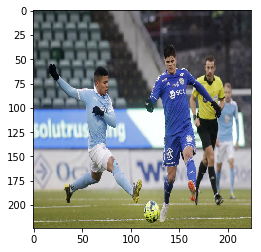

PIL image size (299, 299)


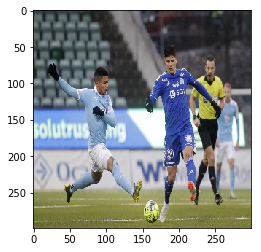

Modeltype: vgg_16, Label: soccer_ball, Confidence: 0.4839111864566803
Modeltype: vgg_16, Label: rugby_ball, Confidence: 0.28399690985679626
Modeltype: vgg_16, Label: ballplayer, Confidence: 0.16250227391719818
Modeltype: vgg_16, Label: football_helmet, Confidence: 0.04066545516252518
Modeltype: vgg_16, Label: parachute, Confidence: 0.012005871161818504
Modeltype: inception_v3, Label: soccer_ball, Confidence: 0.6374859809875488
Modeltype: inception_v3, Label: rugby_ball, Confidence: 0.06376014649868011
Modeltype: inception_v3, Label: baseball, Confidence: 0.025452498346567154
Modeltype: inception_v3, Label: volleyball, Confidence: 0.007595480419695377
Modeltype: inception_v3, Label: tennis_ball, Confidence: 0.005491820629686117
Modeltype: resnet_50, Label: soccer_ball, Confidence: 0.47974368929862976
Modeltype: resnet_50, Label: football_helmet, Confidence: 0.23342786729335785
Modeltype: resnet_50, Label: ballplayer, Confidence: 0.13220332562923431
Modeltype: resnet_50, Label: baseball,

In [30]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
predres = {} 
filename = 'fotboll.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show() 
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

# load an image in PIL format
incep_original = load_img(filename, target_size=(299, 299))
print('PIL image size',incep_original.size)
plt.imshow(incep_original)
plt.show() 
incep_numpy_image = img_to_array(incep_original)
incep_image_batch = np.expand_dims(incep_numpy_image, axis=0)

# VGG
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)
predres['vgg_16'] = decode_predictions(predictions)

# INCEPTION
processed_image = inception_v3.preprocess_input(incep_image_batch.copy())
predictions = inception_model.predict(processed_image)
predres['inception_v3'] = decode_predictions(predictions)

# RESNET_50
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
predres['resnet_50'] = decode_predictions(predictions)

# MOBILENET
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
predres['mobilenet'] = decode_predictions(predictions)

# DENSENET
processed_image = densenet.preprocess_input(image_batch.copy())
predictions = densenet_model.predict(processed_image)
predres['densenet'] = decode_predictions(predictions)

# REKOGNITION
import boto3
import base64
with open(filename, "rb") as image_file:
    encoded_string = image_file.read()
client = boto3.client('rekognition')
response = client.detect_labels(
    Image={
        'Bytes': encoded_string,
    },
    MaxLabels=10,
    MinConfidence=75.0
)

for item in predres:
    for modeltype in predres[item]:
        for label in modeltype:
            print("Modeltype: {}, Label: {}, Confidence: {}".format(item,label[1],label[2]))
for label in response['Labels']:
    print("Modeltype: AWS Rekognition, Label: {}, Confidence: {}".format(label['Name'],label['Confidence']))    